# Continued Exploration and Visualization of the data

In [225]:
# Imports
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
from datetime import datetime
import re
from sklearn.preprocessing import MultiLabelBinarizer

Using the merged dataframe from the intial preprocessing

In [226]:
movies = pd.read_csv('../data/merged_dataset.csv')

In [227]:
movies.shape

(22826, 13)

In [228]:
movies.head(3)

,budget,id,original_language,release_date,revenue,runtime,title,vote_average,vote_count,top_cast,director,genres,keywords
0,30000000,862,en,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter,"['Animation', 'Comedy', 'Family']","['jealousy', 'toy', 'boy', 'friendship', 'frie..."
1,65000000,8844,en,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston,"['Adventure', 'Fantasy', 'Family']","['board game', 'disappearance', ""based on chil..."
2,0,15602,en,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch,"['Romance', 'Comedy']","['fishing', 'best friend', 'duringcreditssting..."


In [229]:
# Changing release date to release year instead
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

movies['release_year'] = movies['release_date'].dt.year

movies = movies.drop(columns='release_date')

In [230]:
# Since the original data only included movies until 2017, making sure no years are above that
print(movies['release_year'].max())

2020


In [231]:
# Removing any rows with release_year > 2017
movies.drop(movies[movies['release_year'] > 2017].index, inplace=True)

In [232]:
movies.head(1)

,budget,id,original_language,revenue,runtime,title,vote_average,vote_count,top_cast,director,genres,keywords,release_year
0,30000000,862,en,373554033.0,81.0,Toy Story,7.7,5415.0,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter,"['Animation', 'Comedy', 'Family']","['jealousy', 'toy', 'boy', 'friendship', 'frie...",1995


In [233]:
# Checking if genres, top_cast, and keywords are all the same type
print("genres:")
print(type(movies.loc[0, 'genres']))
print(movies.loc[0, 'genres'])
print(type(movies.loc[0, 'genres'][0]))

print("\ntop_cast:")
print(type(movies.loc[0, 'top_cast']))
print(movies.loc[0, 'top_cast'])
print(type(movies.loc[0, 'top_cast'][0]))

print("\nkeywords:")
print(type(movies.loc[0, 'keywords']))
print(movies.loc[0, 'keywords'])
print(type(movies.loc[0, 'keywords'][0]))

genres:
<class 'str'>
['Animation', 'Comedy', 'Family']
<class 'str'>

top_cast:
<class 'str'>
['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim Varney', 'Wallace Shawn']
<class 'str'>

keywords:
<class 'str'>
['jealousy', 'toy', 'boy', 'friendship', 'friends', 'rivalry', 'boy next door', 'new toy', 'toy comes to life']
<class 'str'>


After saving the dataframe to csv the columns got converted to string objects - for further processing these will be converted back to lists

In [234]:
# Convert columns from string to list
for col in ['genres', 'top_cast', 'keywords']:
    movies[col] = movies[col].apply(ast.literal_eval)

In [235]:
print("genres:")
print(type(movies.loc[0, 'genres']))
print(movies.loc[0, 'genres'])
print(type(movies.loc[0, 'genres'][0]))

print("\ntop_cast:")
print(type(movies.loc[0, 'top_cast']))
print(movies.loc[0, 'top_cast'])
print(type(movies.loc[0, 'top_cast'][0]))

print("\nkeywords:")
print(type(movies.loc[0, 'keywords']))
print(movies.loc[0, 'keywords'])
print(type(movies.loc[0, 'keywords'][0]))

genres:
<class 'list'>
['Animation', 'Comedy', 'Family']
<class 'str'>

top_cast:
<class 'list'>
['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim Varney', 'Wallace Shawn']
<class 'str'>

keywords:
<class 'list'>
['jealousy', 'toy', 'boy', 'friendship', 'friends', 'rivalry', 'boy next door', 'new toy', 'toy comes to life']
<class 'str'>


In [236]:
# To show profitability of each movie, I'll add an extre feature to my dataframe 'profit'
movies['profit'] = movies['revenue'] - movies['budget']

In [237]:
# Check data types and non-null counts
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22824 entries, 0 to 22825
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             22824 non-null  int64  
 1   id                 22824 non-null  int64  
 2   original_language  22824 non-null  object 
 3   revenue            22824 non-null  float64
 4   runtime            22824 non-null  float64
 5   title              22824 non-null  object 
 6   vote_average       22824 non-null  float64
 7   vote_count         22824 non-null  float64
 8   top_cast           22824 non-null  object 
 9   director           22824 non-null  object 
 10  genres             22824 non-null  object 
 11  keywords           22824 non-null  object 
 12  release_year       22824 non-null  int32  
 13  profit             22824 non-null  float64
dtypes: float64(5), int32(1), int64(2), object(6)
memory usage: 3.0+ MB


In [238]:
movies.describe()

,budget,id,revenue,runtime,vote_average,vote_count,release_year,profit
count,2.282400e+04,22824.000000,2.282400e+04,22824.000000,22824.000000,22824.000000,22824.000000,2.282400e+04
mean,8.271285e+06,84614.512837,2.223621e+07,100.554329,6.172511,215.151157,1996.152909,1.396492e+07
std,2.388151e+07,110938.632503,8.941968e+07,32.886070,0.996609,677.142982,21.042172,7.289142e+07
min,0.000000e+00,2.000000,0.000000e+00,0.000000,0.000000,10.000000,1874.000000,-1.657101e+08
25%,0.000000e+00,13921.500000,0.000000e+00,90.000000,5.600000,17.000000,1987.000000,0.000000e+00
50%,0.000000e+00,34083.000000,0.000000e+00,98.000000,6.300000,34.000000,2004.000000,0.000000e+00
75%,3.200000e+06,90265.500000,1.252534e+06,111.000000,6.900000,109.000000,2011.000000,0.000000e+00
max,3.800000e+08,464111.000000,2.787965e+09,900.000000,9.500000,14075.000000,2017.000000,2.550965e+09


Some observations from the describe table:
- Many zero values in budget and revenue (median and 25% are zero), indicating a large amount of missing or unreported data.
- Extremely high values for certain features, meaning outliers are definitely present
- The mean is much higher than the median for budget, revenue, and vote_count, which indicates right-skewed (negatively skewed) data.

In [239]:
# Finding zero rows
zero_budget_count = (movies['budget'] == 0).sum()
zero_revenue_count = (movies['revenue'] == 0).sum()
zero_runtime_count = (movies['runtime'] == 0).sum()

print(f"Number of movies with zero budget: {zero_budget_count}")
print(f"Number of movies with zero revenue: {zero_revenue_count}")
print(f"Number of movies with zero runtime: {zero_runtime_count}")

Number of movies with zero budget: 15250
Number of movies with zero revenue: 16038
Number of movies with zero runtime: 219


Considering the very large amount of rows that are zero, replacing these with some representation of other budget/revenue values would quickly create a bias and have a negative impact. I will instead convert these to NaN and remove them

In [240]:
# Replacing zeros with NaN for budget, revenue, and runtime, removing them from the dataframe
movies['budget'] = movies['budget'].replace(0, np.nan)
movies['revenue'] = movies['revenue'].replace(0, np.nan)
movies['runtime'] = movies['runtime'].replace(0, np.nan)

movies = movies.dropna(subset=['budget', 'revenue', 'runtime'])


In [241]:
movies.shape

(5122, 14)

In [242]:
movies.describe()

,budget,id,revenue,runtime,vote_average,vote_count,release_year,profit
count,5.122000e+03,5122.00000,5.122000e+03,5122.000000,5122.000000,5122.000000,5122.000000,5.122000e+03
mean,3.246831e+07,58802.75654,9.467989e+07,110.126708,6.311734,768.965053,2000.073604,6.221158e+07
std,4.066734e+07,95379.22452,1.691066e+08,21.316863,0.859295,1271.841775,15.372122,1.423478e+08
min,1.000000e+00,5.00000,1.000000e+00,26.000000,2.300000,10.000000,1915.000000,-1.657101e+08
25%,6.000000e+06,8280.50000,8.939056e+06,96.000000,5.800000,95.000000,1994.000000,-1.379298e+06
50%,1.800000e+07,13492.50000,3.357048e+07,106.000000,6.300000,303.000000,2004.000000,1.329016e+07
75%,4.000000e+07,54566.00000,1.043957e+08,120.000000,6.900000,851.750000,2011.000000,6.699703e+07
max,3.800000e+08,443319.00000,2.787965e+09,338.000000,9.100000,14075.000000,2017.000000,2.550965e+09


After removing 0 values in budget, revenue, and runtime, the descriptive statistics for the dataset have changed significantly.

- The number of movies has dropped from over 22,000 to just 5,122, meaning only about 23% of the original data had reported and valid data for the three features.
- The mean and median for budget and revenue have increased substantially - as an example the median budget is now \$18 million, and the median revenue is \$33.6 million, where both was \$0 before
- The maximum values for budget and revenue remain high, and the standard deviations are still large, indicating that outliers are still present in the data.
- The mean is still higher than the median for budget, revenue, and vote_count, indicating the data remains negatively skewed, but the difference is less extreme than before.

Removing rows with zero values has made the summary statistics more meaningful for financial analysis, but at the cost of reducing the dataset size and potentially introducing selection bias.

Let's check for outliers using boxplots and create histograms to check the distribution


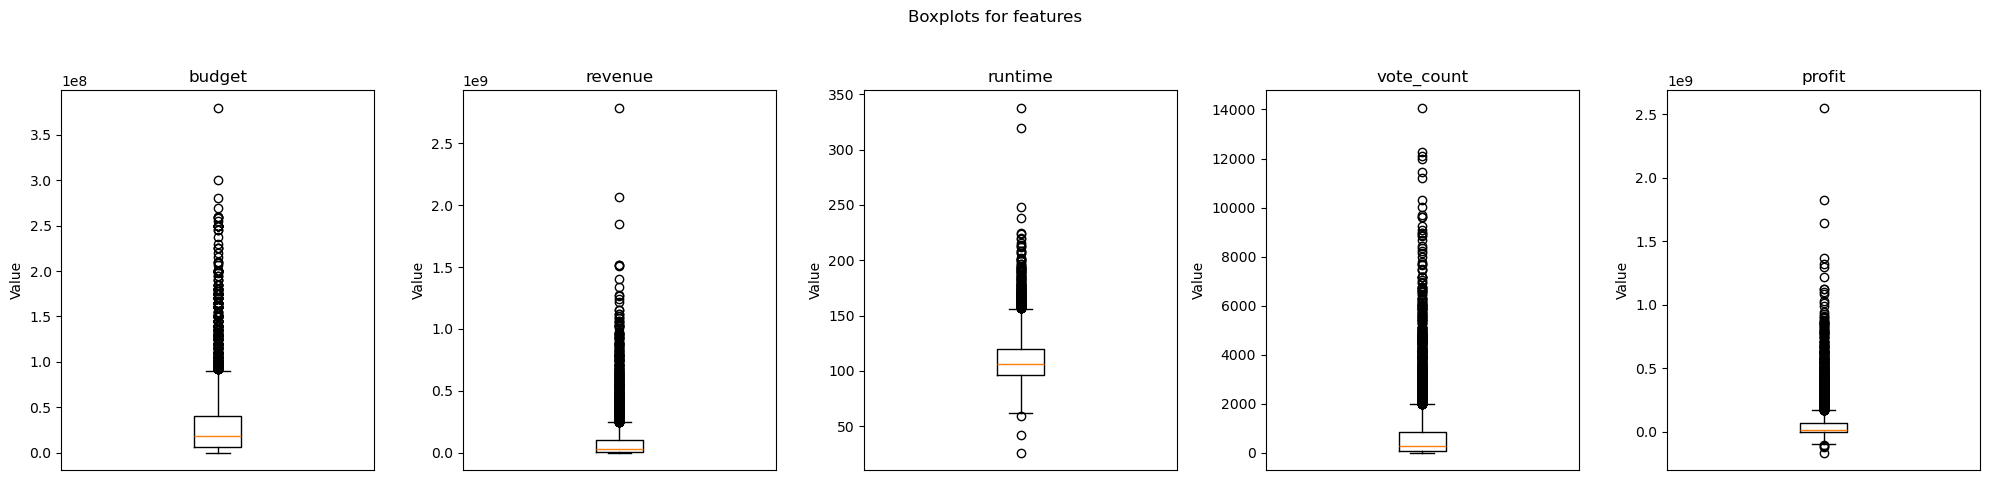

In [243]:
features = ['budget', 'revenue', 'runtime', 'vote_count', 'profit']

fig, axes = plt.subplots(1, len(features), figsize=(20, 5))

for i, feature in enumerate(features):
    axes[i].boxplot(movies[feature].dropna(), vert=True)
    axes[i].set_title(feature)
    axes[i].set_ylabel('Value')
    axes[i].set_xticks([])  # Hide x-tick labels for clarity

plt.suptitle('Boxplots for features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()

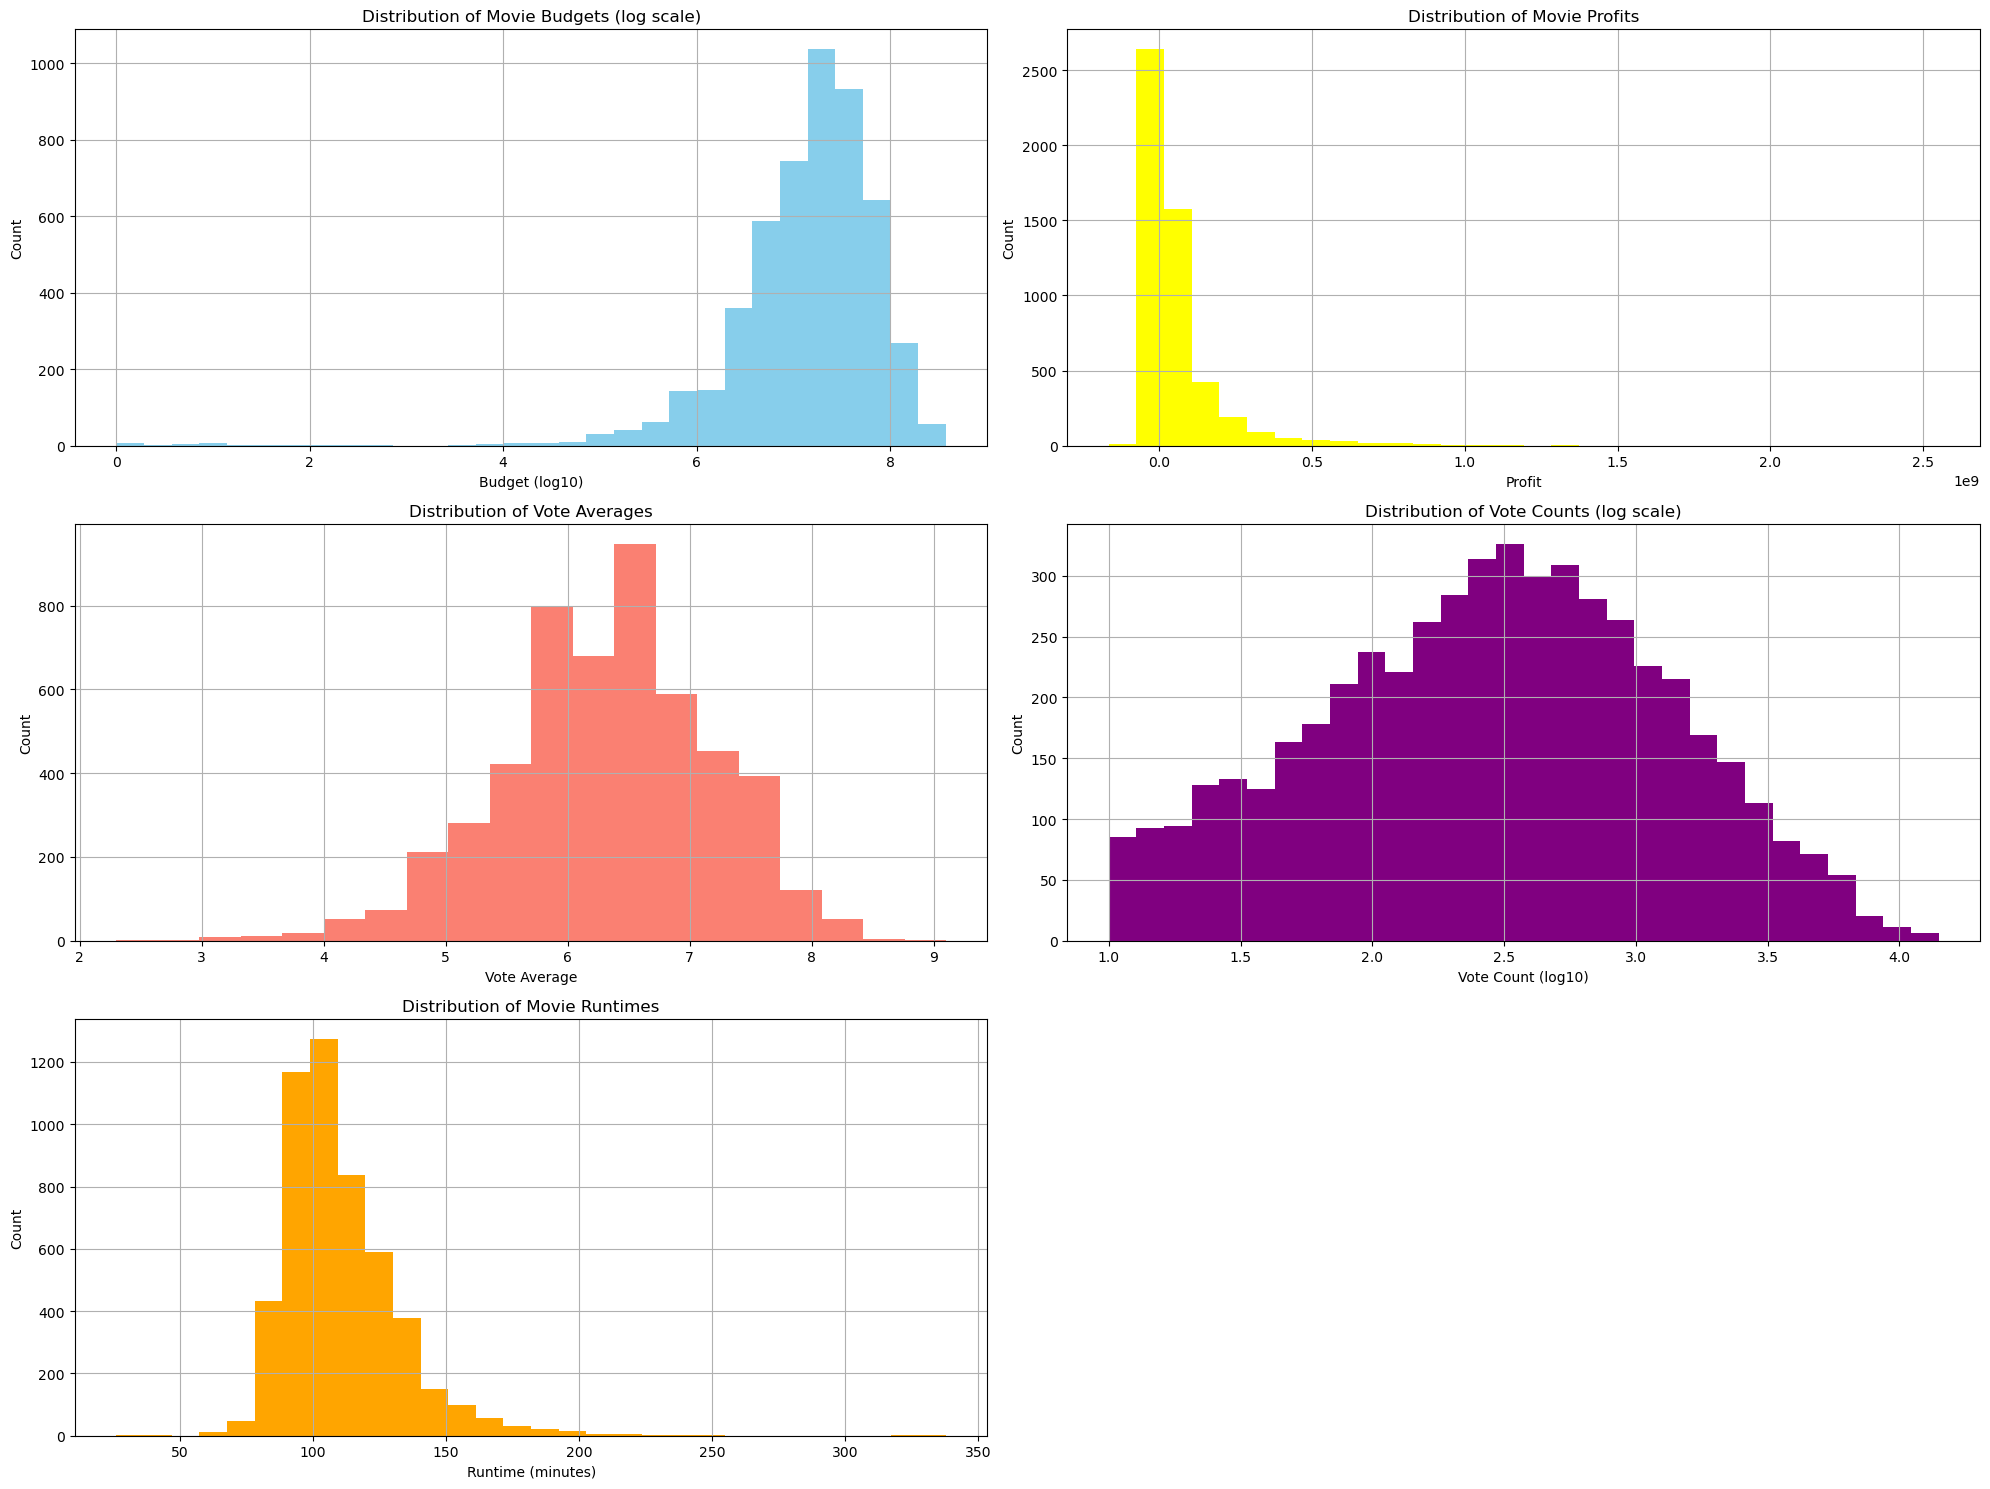

In [244]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

# Budget distribution (log scale)
movies['budget'].apply(np.log10).hist(
    bins=30, color='skyblue', ax=axes[0, 0]
)
axes[0, 0].set_title('Distribution of Movie Budgets (log scale)')
axes[0, 0].set_xlabel('Budget (log10)')
axes[0, 0].set_ylabel('Count')

# Revenue distribution (log scale)
movies['revenue'].apply(np.log10).hist(
    bins=30, color='lightgreen', ax=axes[0, 1]
)
axes[0, 1].set_title('Distribution of Movie Revenue (log scale)')
axes[0, 1].set_xlabel('Revenue (log10)')
axes[0, 1].set_ylabel('Count')

# Movie profits
movies['profit'].hist(
    bins=30, color='yellow', ax=axes[0, 1]
)
axes[0, 1].set_title('Distribution of Movie Profits')
axes[0, 1].set_xlabel('Profit')
axes[0, 1].set_ylabel('Count')

# Vote average distribution
movies['vote_average'].hist(
    bins=20, color='salmon', ax=axes[1, 0]
)
axes[1, 0].set_title('Distribution of Vote Averages')
axes[1, 0].set_xlabel('Vote Average')
axes[1, 0].set_ylabel('Count')

# Vote count distribution (log scale)
movies['vote_count'].apply(np.log10).hist(
    bins=30, color='purple', ax=axes[1, 1]
)
axes[1, 1].set_title('Distribution of Vote Counts (log scale)')
axes[1, 1].set_xlabel('Vote Count (log10)')
axes[1, 1].set_ylabel('Count')

# Runtime distribution
movies['runtime'].hist(
    bins=30, color='orange', ax=axes[2, 0]
)
axes[2, 0].set_title('Distribution of Movie Runtimes')
axes[2, 0].set_xlabel('Runtime (minutes)')
axes[2, 0].set_ylabel('Count')

# Hide the empty subplot (bottom right)
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


There is a large number of outliers, but because some of them (at least for budget and revenue) most likely will be due to rare cases like blockbuster hits, I want to keep them represented in my data - however, I'll remove rows with extremely long runtimes using IQR

In [245]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

movies = remove_outliers_iqr(movies, 'runtime')


In [246]:
movies.shape

(4941, 14)

In [247]:
movies.describe()

,budget,id,revenue,runtime,vote_average,vote_count,release_year,profit
count,4.941000e+03,4941.000000,4.941000e+03,4941.000000,4941.000000,4941.000000,4941.000000,4.941000e+03
mean,3.212455e+07,59134.728800,9.202733e+07,107.750860,6.282433,749.979559,2000.342238,5.990278e+07
std,3.982166e+07,95429.796497,1.591851e+08,16.730492,0.851590,1213.204400,15.048157,1.330808e+08
min,1.000000e+00,5.000000,1.000000e+00,62.000000,2.300000,10.000000,1921.000000,-1.657101e+08
25%,6.000000e+06,8467.000000,8.586376e+06,95.000000,5.700000,97.000000,1994.000000,-1.498062e+06
50%,1.800000e+07,13537.000000,3.320810e+07,105.000000,6.300000,303.000000,2005.000000,1.288106e+07
75%,4.000000e+07,55347.000000,1.035903e+08,119.000000,6.900000,847.000000,2011.000000,6.605372e+07
max,3.800000e+08,443319.000000,2.068224e+09,156.000000,8.700000,14075.000000,2017.000000,1.823224e+09


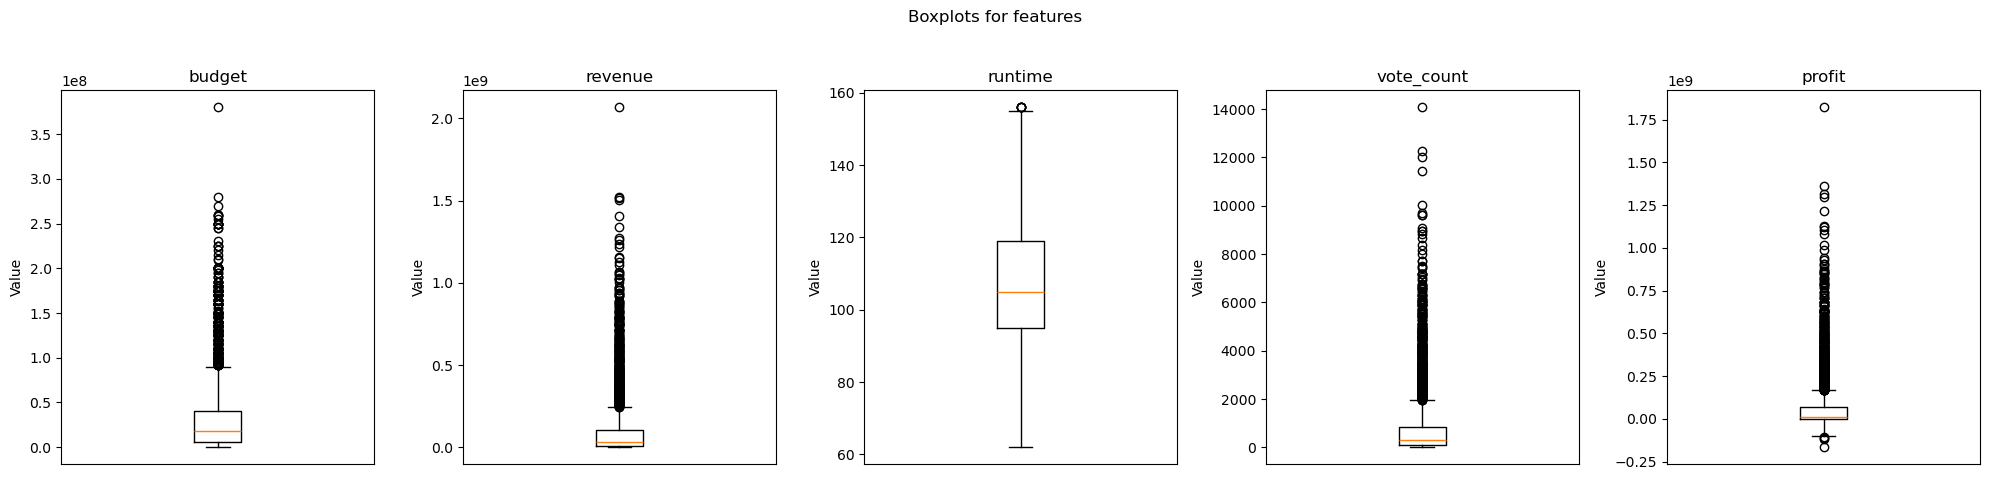

In [248]:
# Remaking the boxplots to show the change
features = ['budget', 'revenue', 'runtime', 'vote_count', 'profit']

fig, axes = plt.subplots(1, len(features), figsize=(20, 5))

for i, feature in enumerate(features):
    axes[i].boxplot(movies[feature].dropna(), vert=True)
    axes[i].set_title(feature)
    axes[i].set_ylabel('Value')
    axes[i].set_xticks([])  

plt.suptitle('Boxplots for features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

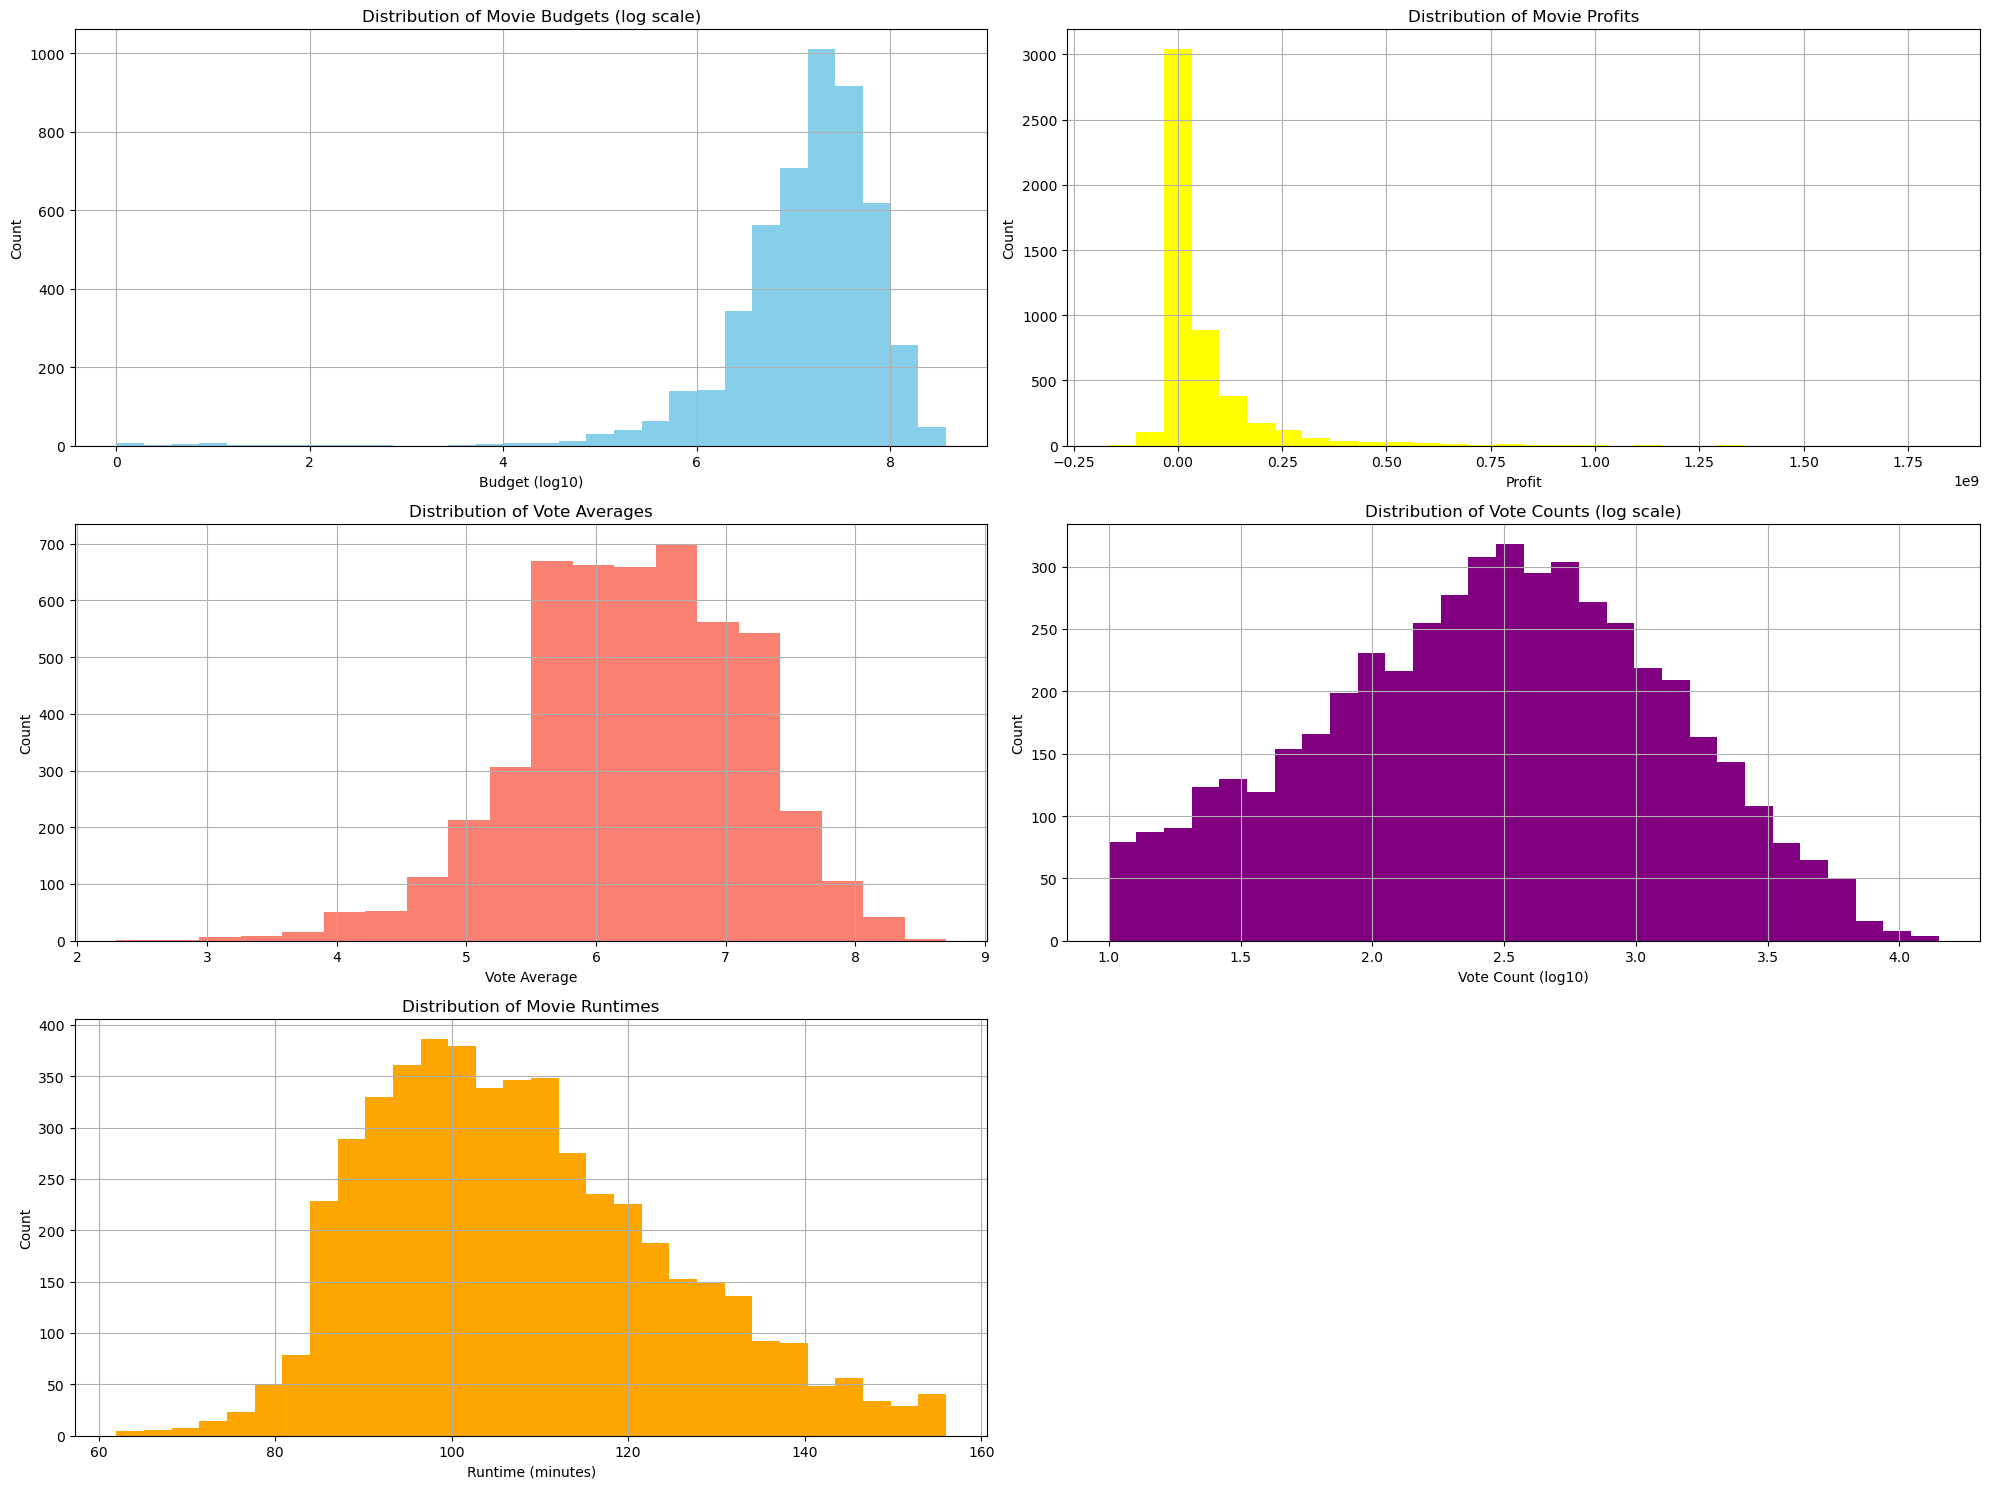

In [249]:
# As well as the histograms
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

# Budget distribution (log scale)
movies['budget'].apply(np.log10).hist(
    bins=30, color='skyblue', ax=axes[0, 0]
)
axes[0, 0].set_title('Distribution of Movie Budgets (log scale)')
axes[0, 0].set_xlabel('Budget (log10)')
axes[0, 0].set_ylabel('Count')

# Revenue distribution (log scale)
movies['revenue'].apply(np.log10).hist(
    bins=30, color='lightgreen', ax=axes[0, 1]
)
axes[0, 1].set_title('Distribution of Movie Revenue (log scale)')
axes[0, 1].set_xlabel('Revenue (log10)')
axes[0, 1].set_ylabel('Count')

# Movie profits
movies['profit'].hist(
    bins=30, color='yellow', ax=axes[0, 1]
)
axes[0, 1].set_title('Distribution of Movie Profits')
axes[0, 1].set_xlabel('Profit')
axes[0, 1].set_ylabel('Count')

# Vote average distribution
movies['vote_average'].hist(
    bins=20, color='salmon', ax=axes[1, 0]
)
axes[1, 0].set_title('Distribution of Vote Averages')
axes[1, 0].set_xlabel('Vote Average')
axes[1, 0].set_ylabel('Count')

# Vote count distribution (log scale)
movies['vote_count'].apply(np.log10).hist(
    bins=30, color='purple', ax=axes[1, 1]
)
axes[1, 1].set_title('Distribution of Vote Counts (log scale)')
axes[1, 1].set_xlabel('Vote Count (log10)')
axes[1, 1].set_ylabel('Count')

# Runtime distribution
movies['runtime'].hist(
    bins=30, color='orange', ax=axes[2, 0]
)
axes[2, 0].set_title('Distribution of Movie Runtimes')
axes[2, 0].set_xlabel('Runtime (minutes)')
axes[2, 0].set_ylabel('Count')

# Hide the empty subplot (bottom right)
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

The histograms show a negatively skewed distributino for budget and revenue, but a somehwat normal distribution for vote_average, vote_count, and runtime - runtime benefitted from the outlier removal

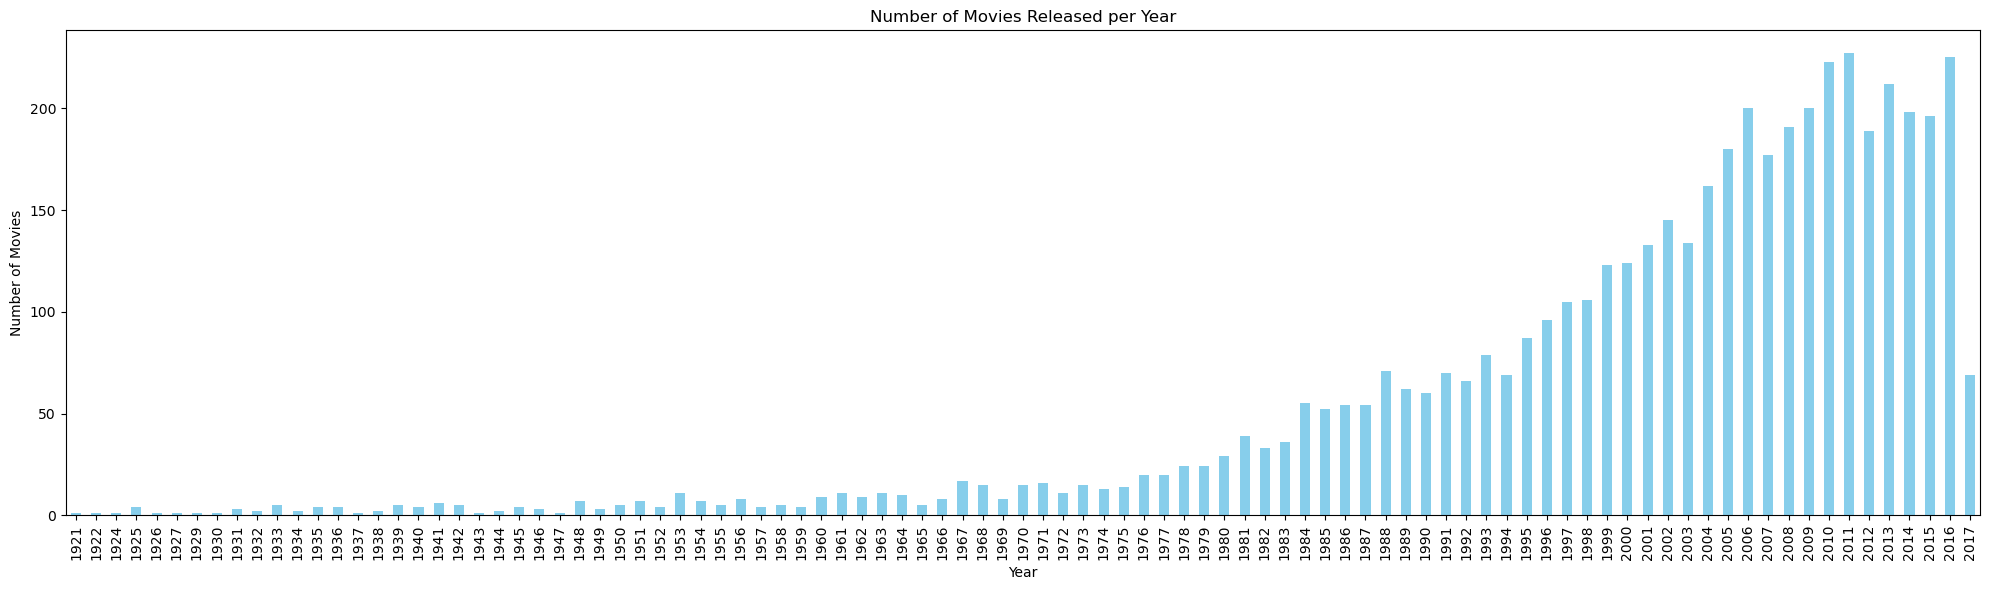

In [250]:
# Movies per year
plt.figure(figsize=(20, 6))
year_counts = movies['release_year'].value_counts().sort_index()
year_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

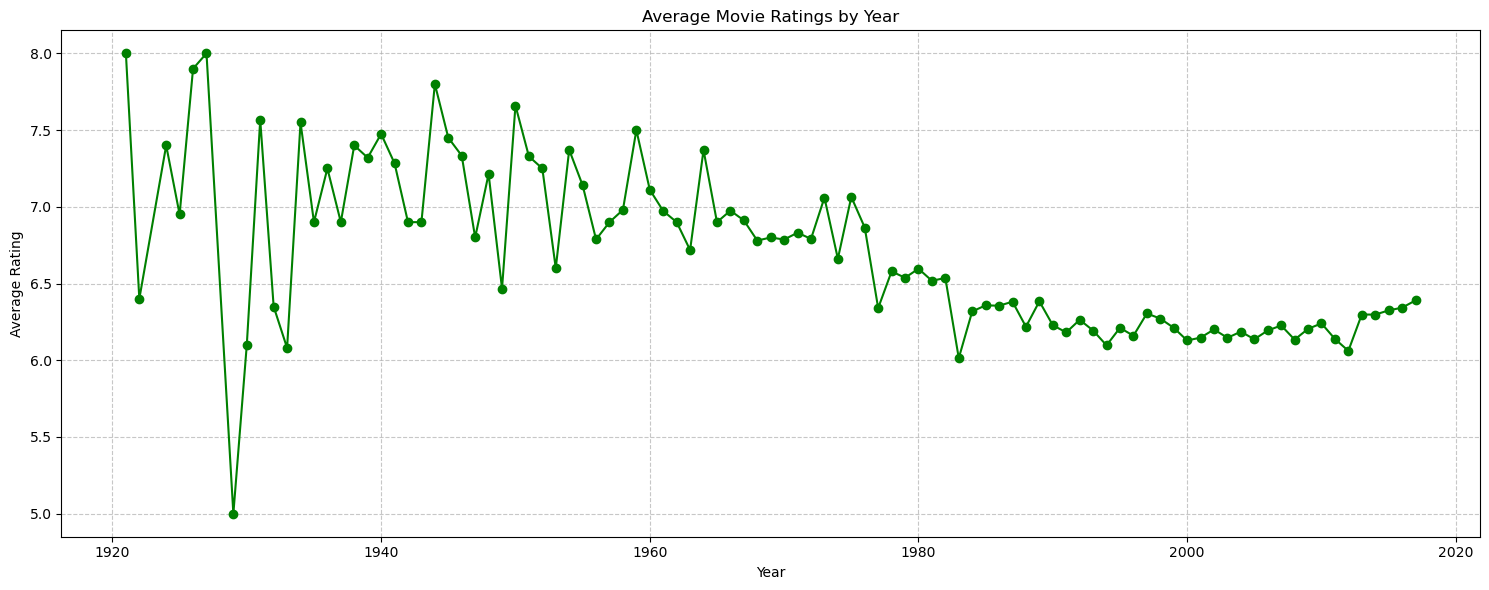

In [251]:
# Average ratings over time
plt.figure(figsize=(15, 6))
yearly_ratings = movies.groupby('release_year')['vote_average'].mean()
yearly_ratings.plot(kind='line', marker='o', color='green')
plt.title('Average Movie Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

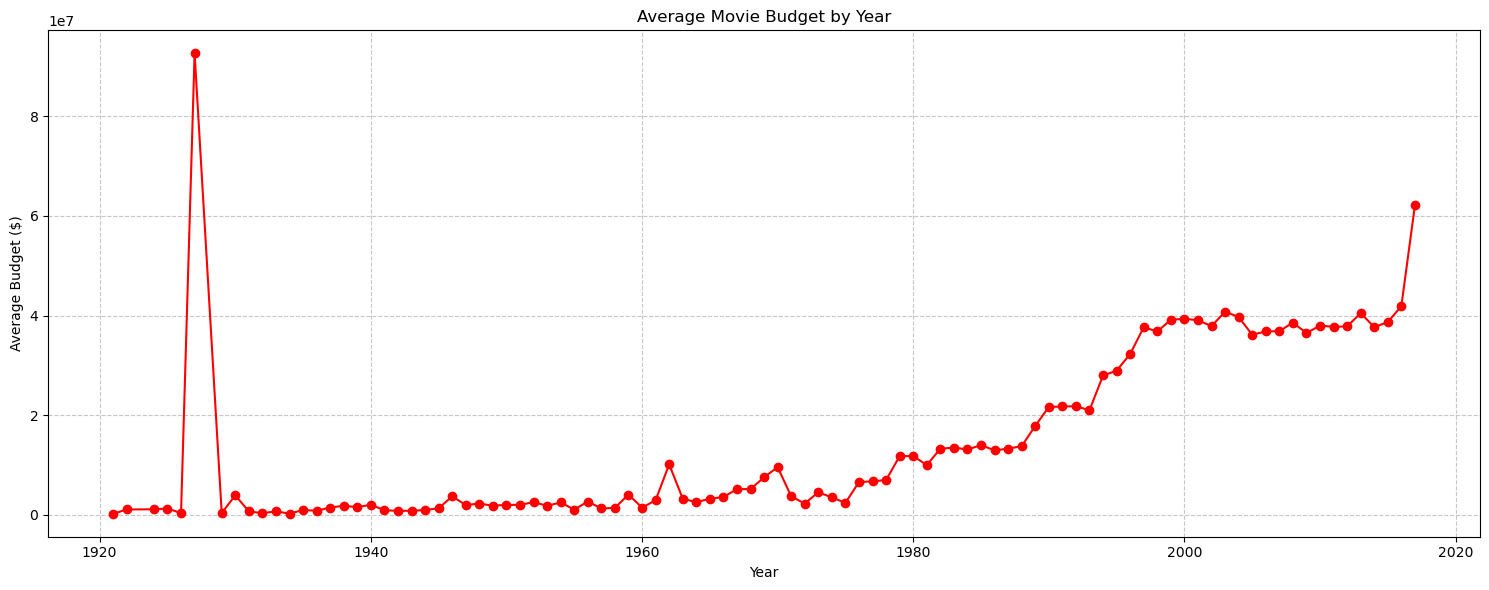

In [252]:
# Average budget over time (not adjusted for inflation)
plt.figure(figsize=(15, 6))
yearly_budget = movies.groupby('release_year')['budget'].mean()
yearly_budget.plot(kind='line', marker='o', color='red')
plt.title('Average Movie Budget by Year')
plt.xlabel('Year')
plt.ylabel('Average Budget ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/bx/f_dht_453s50ypf31yg3cngr0000gn/T/ipykernel_41424/62802642.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')


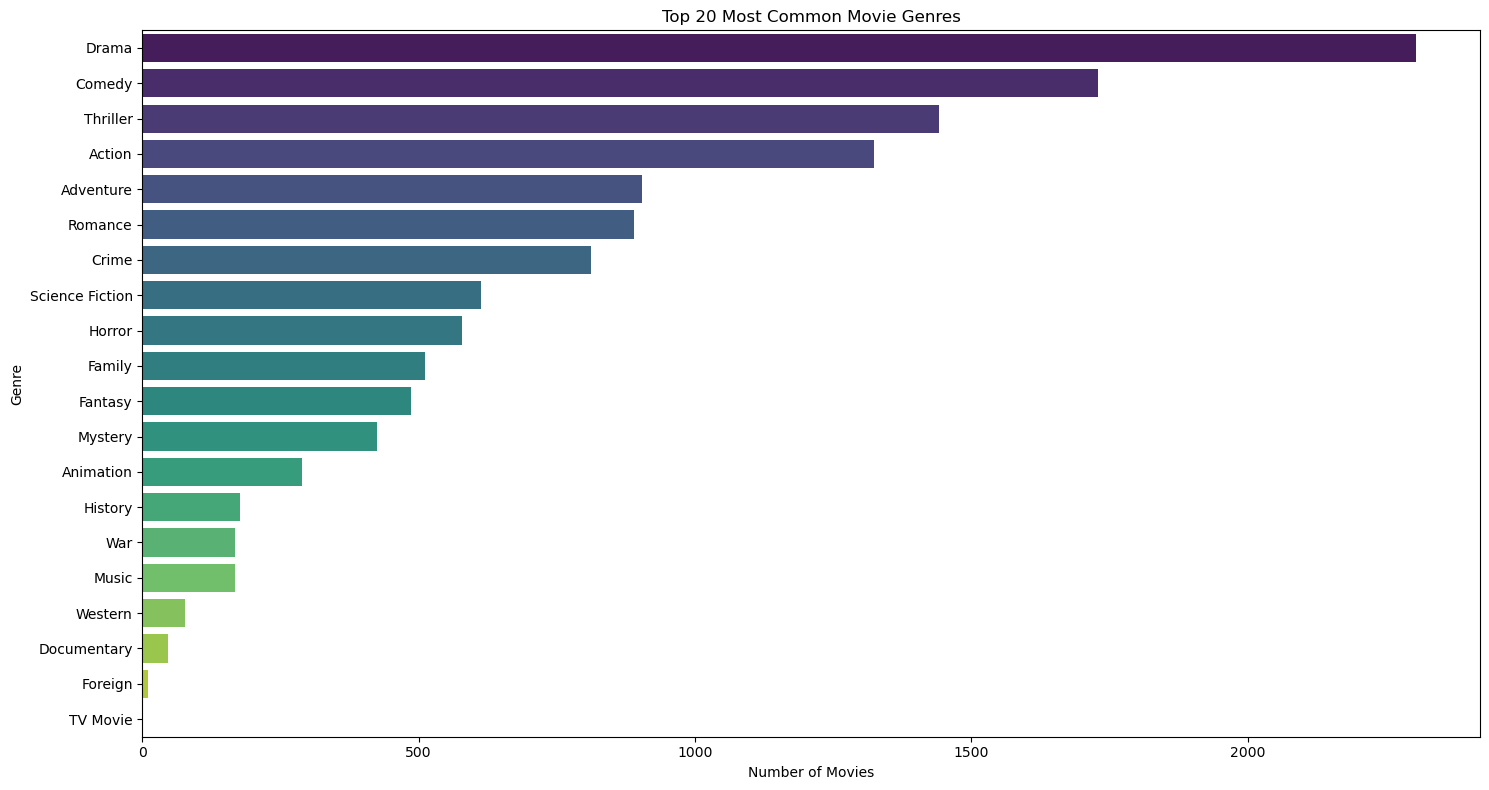

In [253]:
# Top 20 most common genres
plt.figure(figsize=(15, 8))
genre_counts = {}
for genres_list in movies['genres']:
    for genre in genres_list:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

genre_df = pd.DataFrame({'Genre': list(genre_counts.keys()), 'Count': list(genre_counts.values())})
genre_df = genre_df.sort_values('Count', ascending=False).head(20)

sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')
plt.title('Top 20 Most Common Movie Genres')
plt.xlabel('Number of Movies')
plt.tight_layout()
plt.show()

/var/folders/bx/f_dht_453s50ypf31yg3cngr0000gn/T/ipykernel_41424/497909456.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Keyword', data=keyword_df, palette='magma')


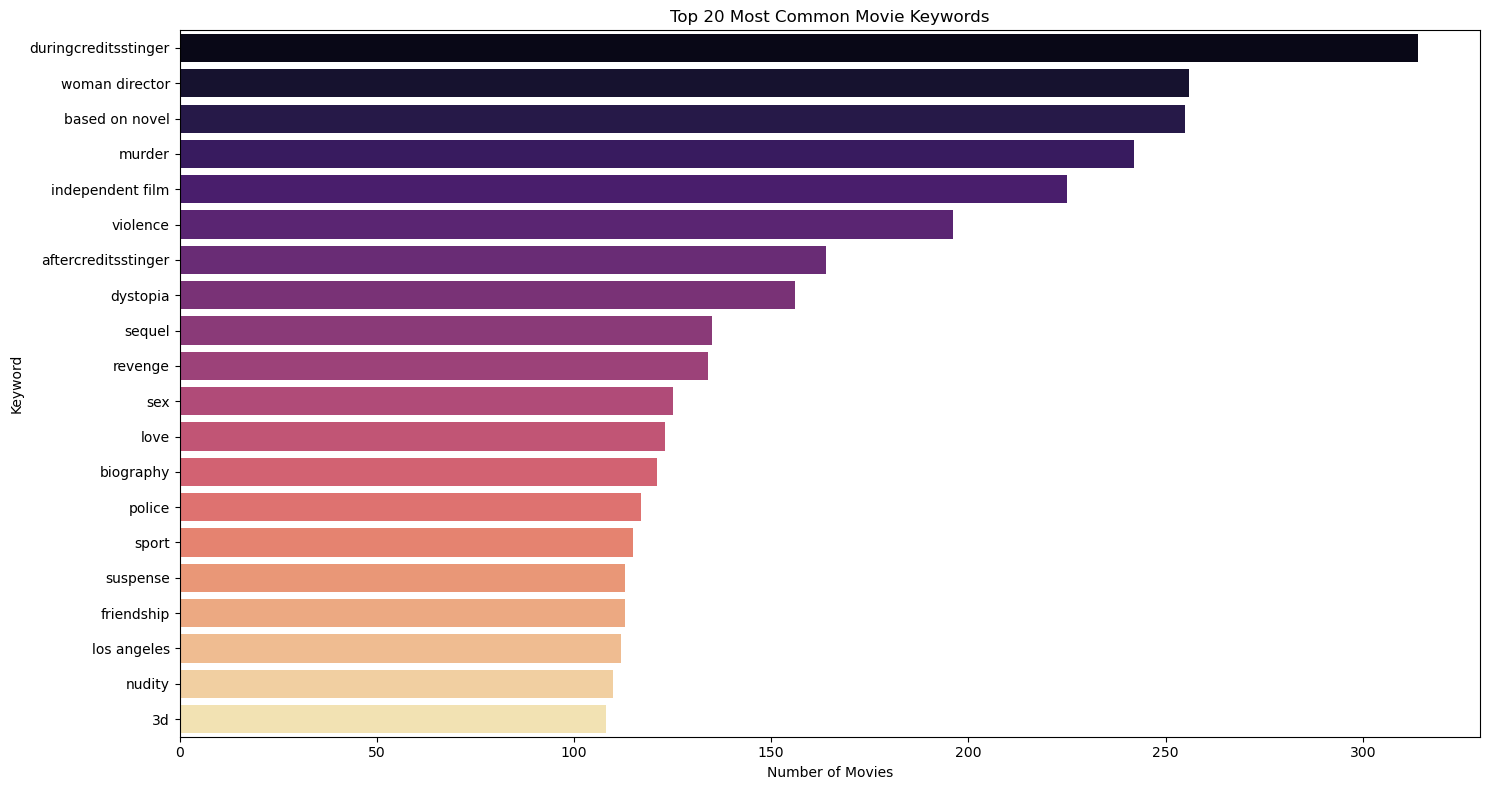

In [254]:
# Top 20 most common keywords
plt.figure(figsize=(15, 8))
keyword_counts = {}
for keywords_list in movies['keywords']:
    for keyword in keywords_list:
        if keyword in keyword_counts:
            keyword_counts[keyword] += 1
        else:
            keyword_counts[keyword] = 1

keyword_df = pd.DataFrame({'Keyword': list(keyword_counts.keys()), 'Count': list(keyword_counts.values())})
keyword_df = keyword_df.sort_values('Count', ascending=False).head(20)

sns.barplot(x='Count', y='Keyword', data=keyword_df, palette='magma')
plt.title('Top 20 Most Common Movie Keywords')
plt.xlabel('Number of Movies')
plt.tight_layout()
plt.show()

/var/folders/bx/f_dht_453s50ypf31yg3cngr0000gn/T/ipykernel_41424/367529588.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Actor', data=actor_df, palette='rocket')


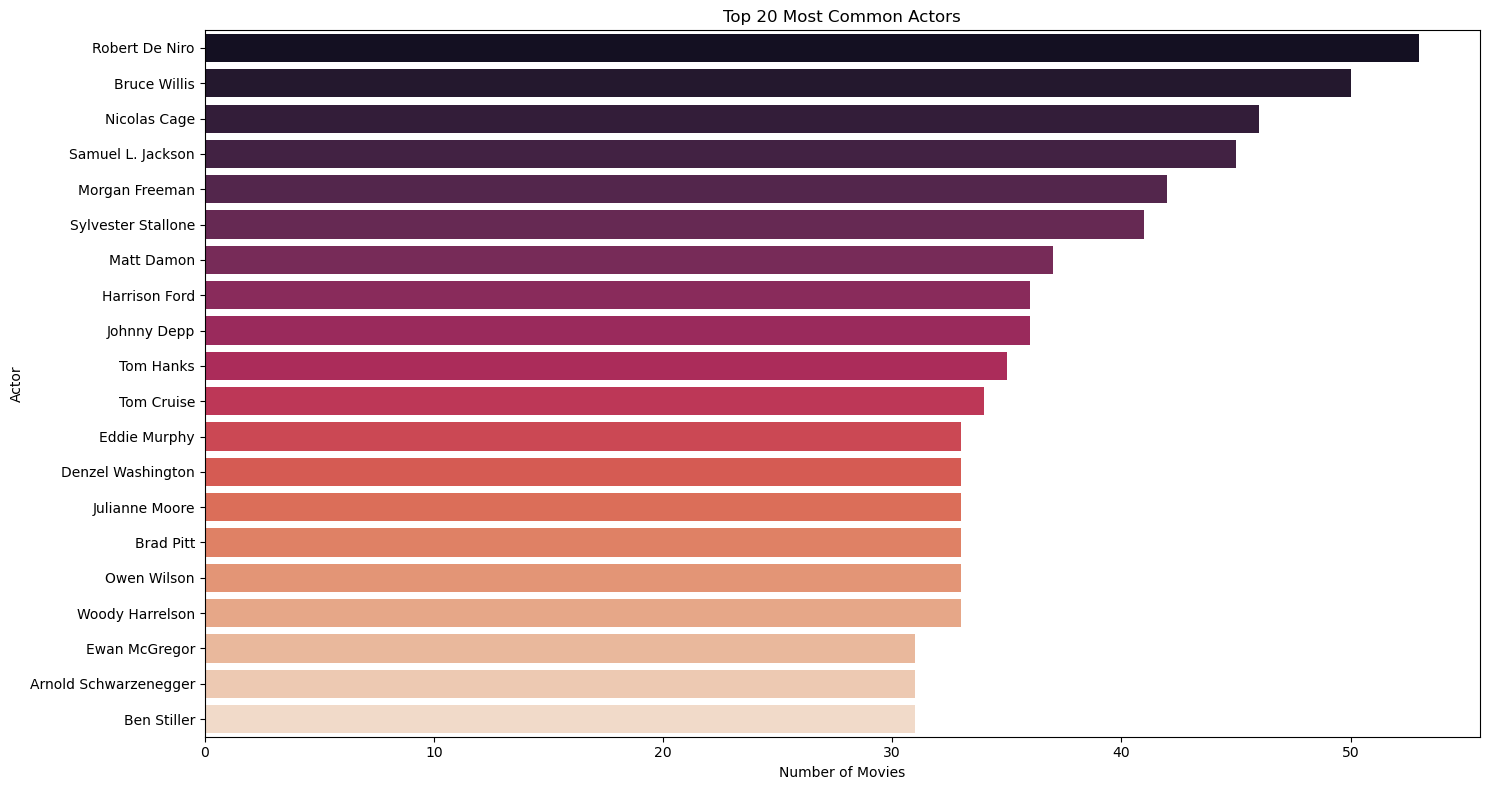

In [255]:
# Top 20 most common actors
plt.figure(figsize=(15, 8))
actor_counts = {}
for cast_list in movies['top_cast']:
    for actor in cast_list:
        if actor in actor_counts:
            actor_counts[actor] += 1
        else:
            actor_counts[actor] = 1

actor_df = pd.DataFrame({'Actor': list(actor_counts.keys()), 'Count': list(actor_counts.values())})
actor_df = actor_df.sort_values('Count', ascending=False).head(20)

sns.barplot(x='Count', y='Actor', data=actor_df, palette='rocket')
plt.title('Top 20 Most Common Actors')
plt.xlabel('Number of Movies')
plt.tight_layout()
plt.show()

/var/folders/bx/f_dht_453s50ypf31yg3cngr0000gn/T/ipykernel_41424/3864034826.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.values, y=director_counts.index, palette='mako')


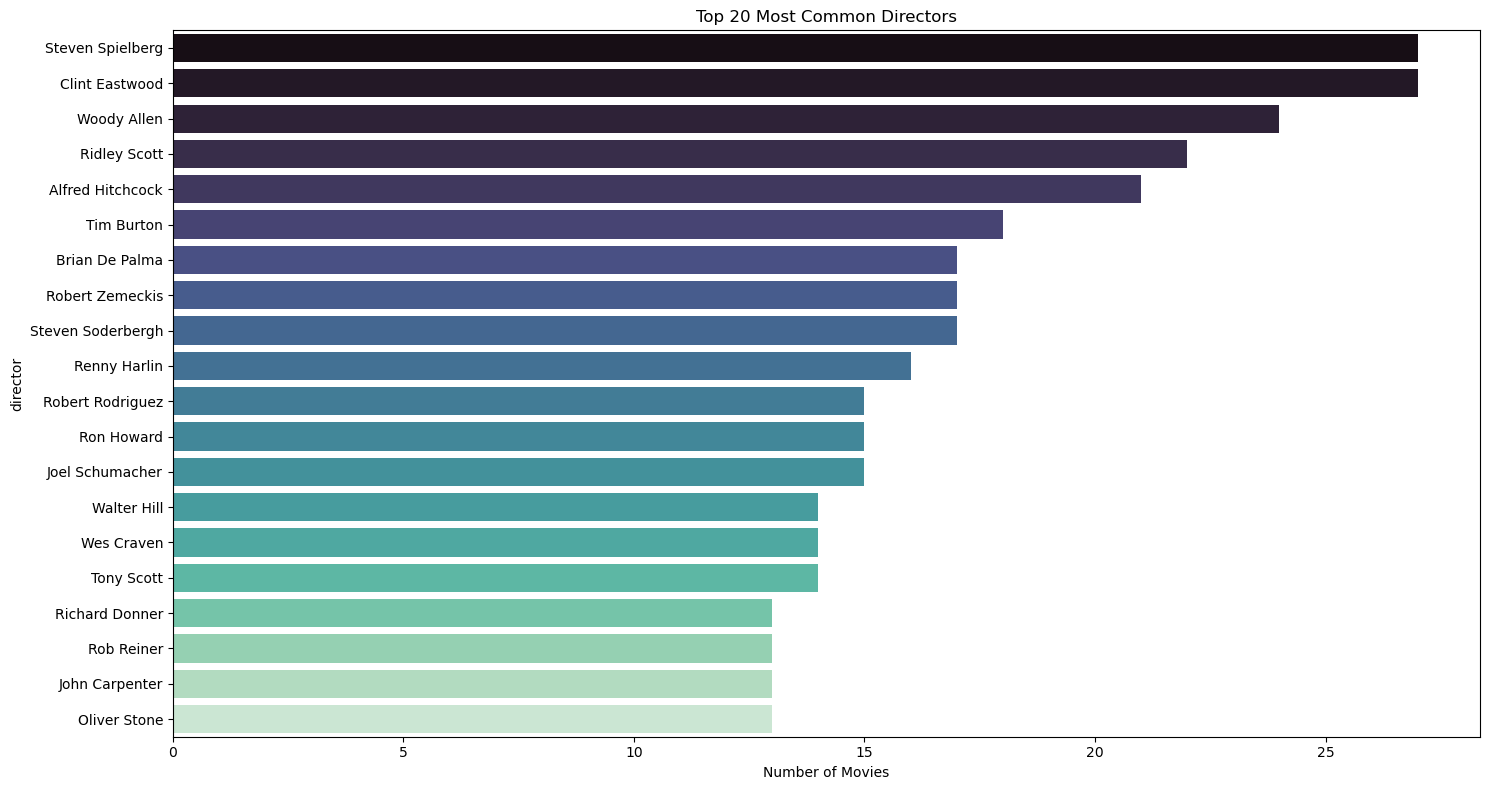

In [256]:
# Top 20 most common directors
plt.figure(figsize=(15, 8))
director_counts = movies['director'].value_counts().head(20)

sns.barplot(x=director_counts.values, y=director_counts.index, palette='mako')
plt.title('Top 20 Most Common Directors')
plt.xlabel('Number of Movies')
plt.tight_layout()
plt.show()

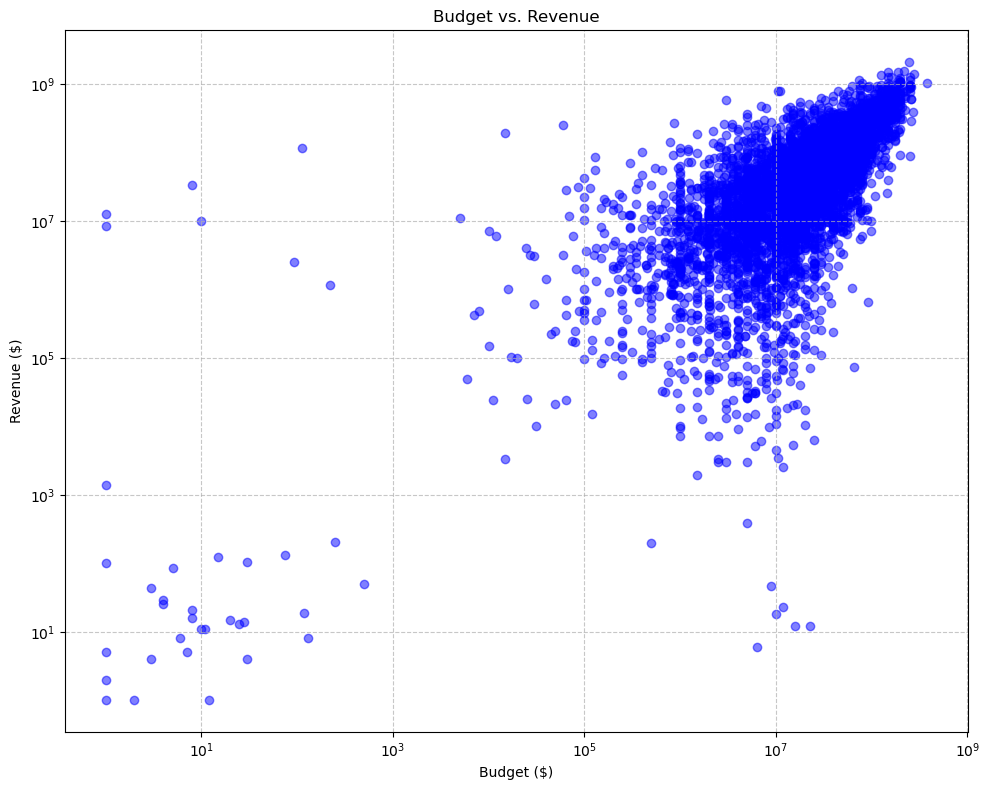

In [257]:
# Budget vs. Revenue (for movies with non-zero values)
plt.figure(figsize=(10, 8))
valid_data = movies[(movies['budget'] > 0) & (movies['revenue'] > 0)]
plt.scatter(valid_data['budget'], valid_data['revenue'], alpha=0.5, color='blue')
plt.title('Budget vs. Revenue')
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

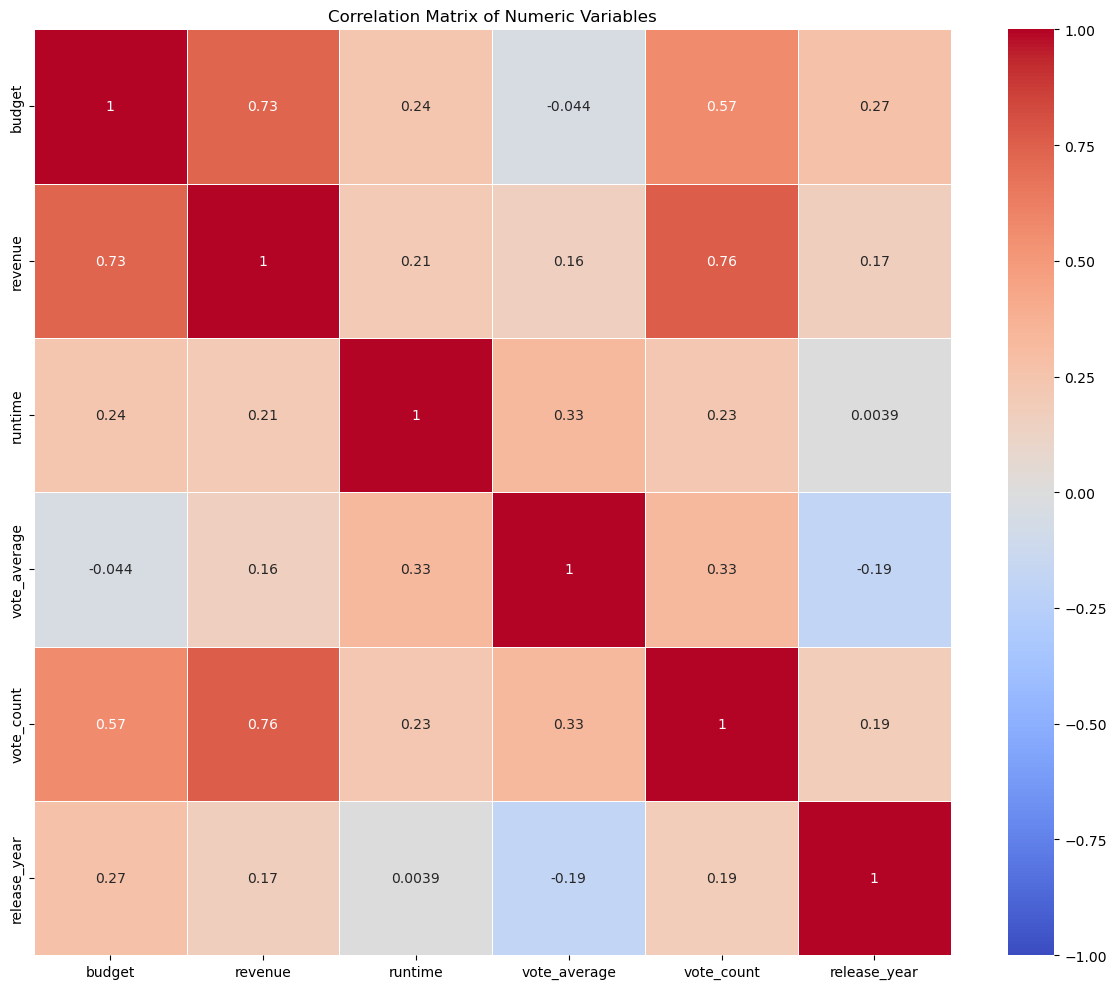

In [258]:
# Correlation matrix for numeric variables
plt.figure(figsize=(12, 10))
numeric_cols = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'release_year']
corr_matrix = movies[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

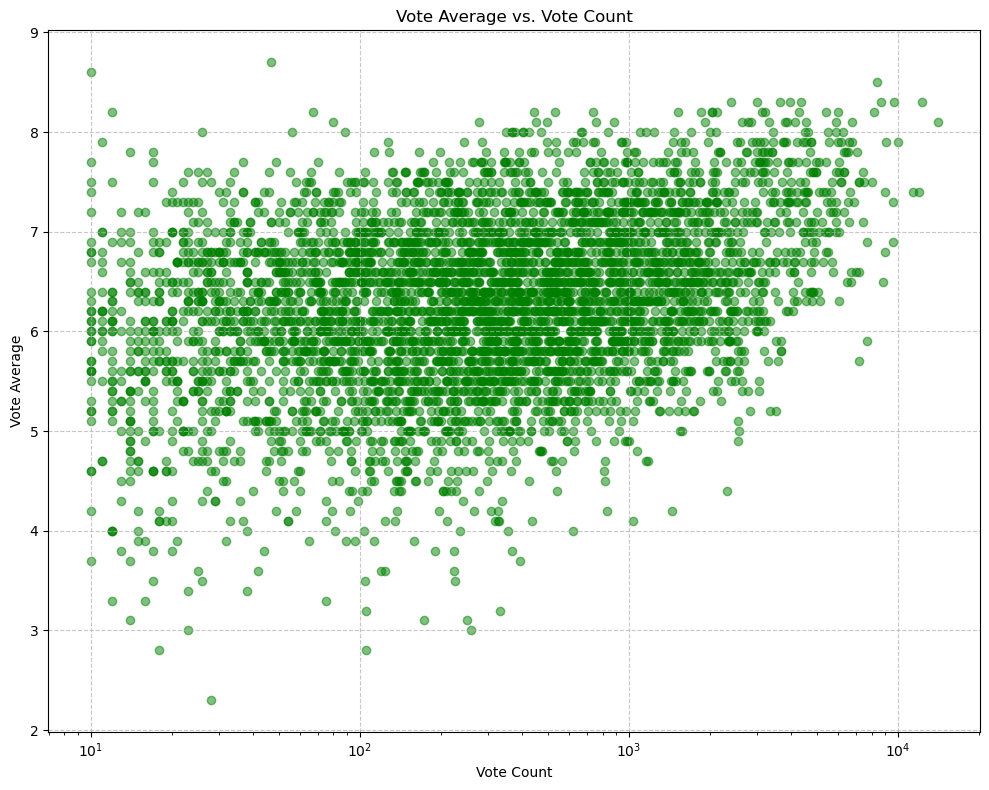

In [259]:
# Vote average vs. vote count
plt.figure(figsize=(10, 8))
plt.scatter(movies['vote_count'], movies['vote_average'], alpha=0.5, color='green')
plt.title('Vote Average vs. Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')
plt.xscale('log')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

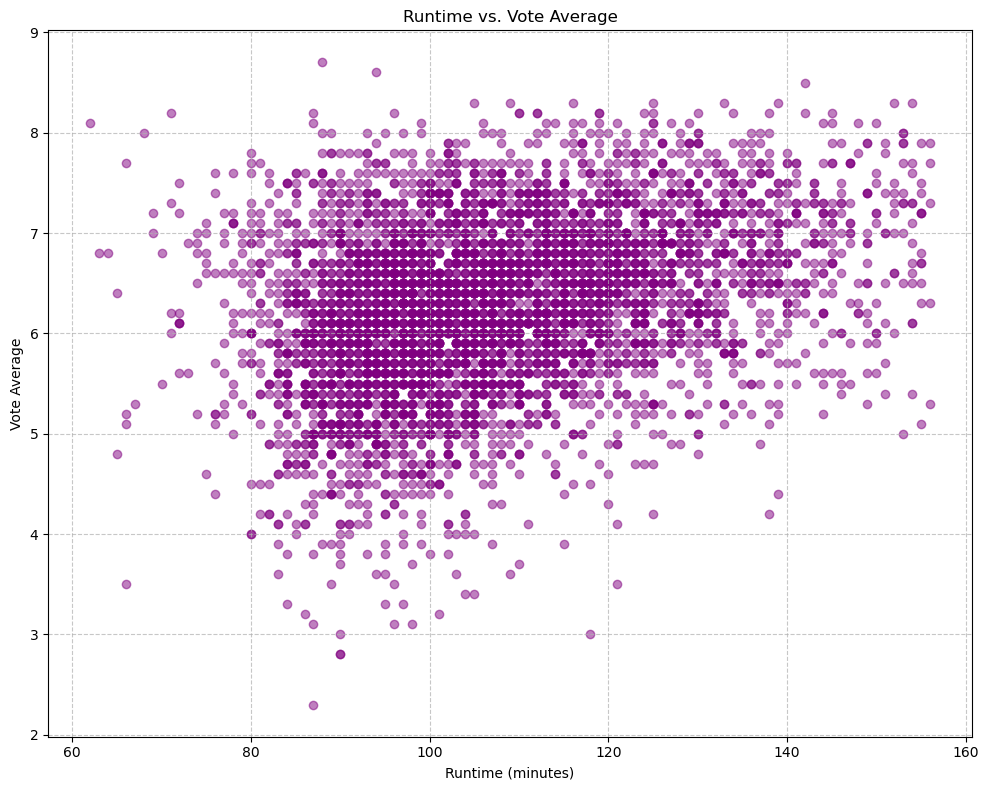

In [260]:
# Runtime vs. Vote Average
plt.figure(figsize=(10, 8))
plt.scatter(movies['runtime'], movies['vote_average'], alpha=0.5, color='purple')
plt.title('Runtime vs. Vote Average')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Vote Average')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/bx/f_dht_453s50ypf31yg3cngr0000gn/T/ipykernel_41424/4085331472.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Rating', y='Genre', data=genre_avg_df, palette='viridis')


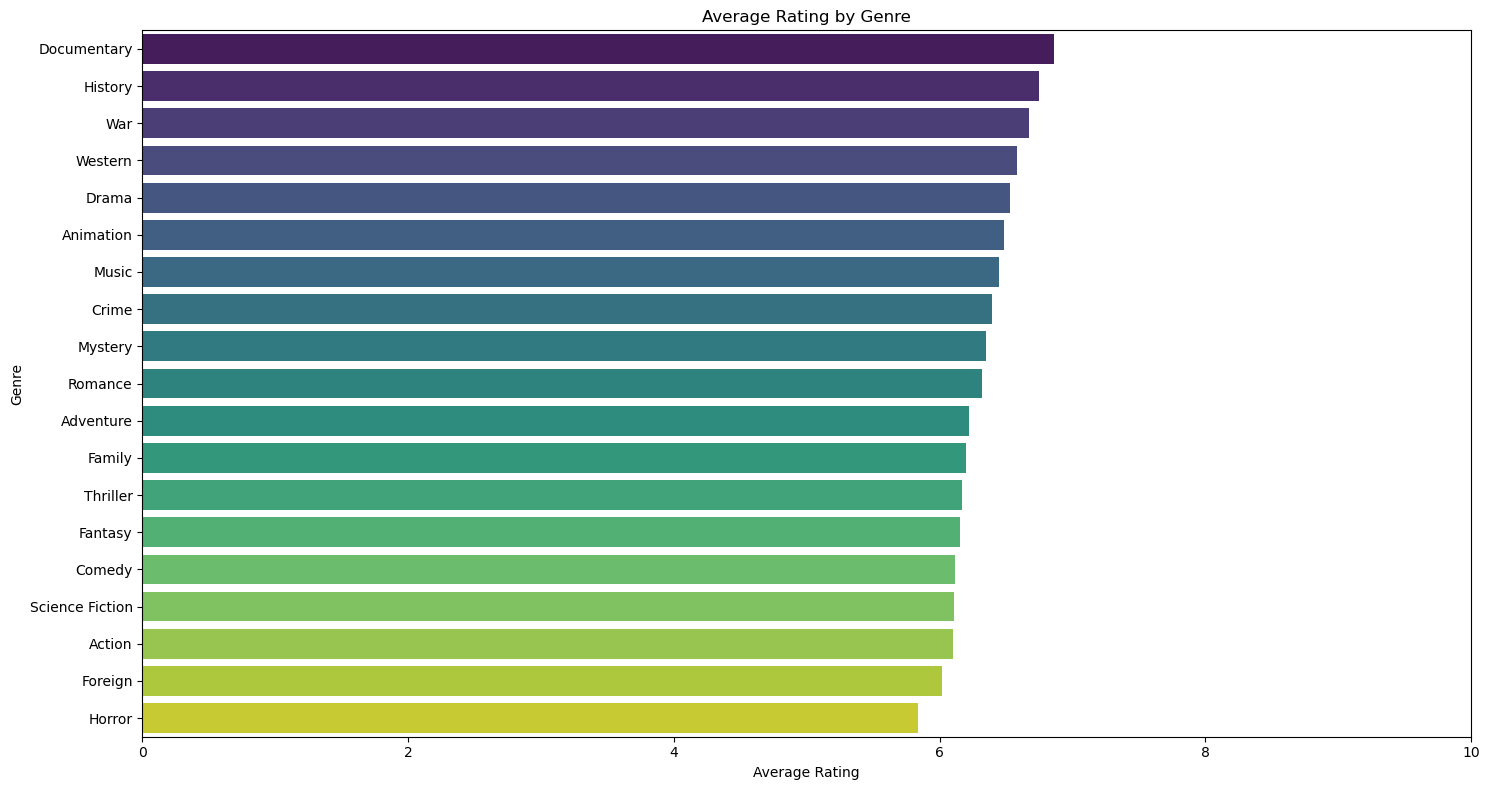

In [261]:
# Average rating by genre
plt.figure(figsize=(15, 8))
genre_ratings = {}
genre_counts = {}

for i, row in movies.iterrows():
    for genre in row['genres']:
        if genre not in genre_ratings:
            genre_ratings[genre] = []
        genre_ratings[genre].append(row['vote_average'])

genre_avg_ratings = {genre: sum(ratings)/len(ratings) for genre, ratings in genre_ratings.items() if len(ratings) >= 10}
genre_avg_df = pd.DataFrame({'Genre': list(genre_avg_ratings.keys()), 'Average Rating': list(genre_avg_ratings.values())})
genre_avg_df = genre_avg_df.sort_values('Average Rating', ascending=False)

sns.barplot(x='Average Rating', y='Genre', data=genre_avg_df, palette='viridis')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.xlim(0, 10)  # Assuming ratings are on a 0-10 scale
plt.tight_layout()
plt.show()

/var/folders/bx/f_dht_453s50ypf31yg3cngr0000gn/T/ipykernel_41424/1163857450.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Budget', y='Genre', data=genre_budget_df, palette='plasma')


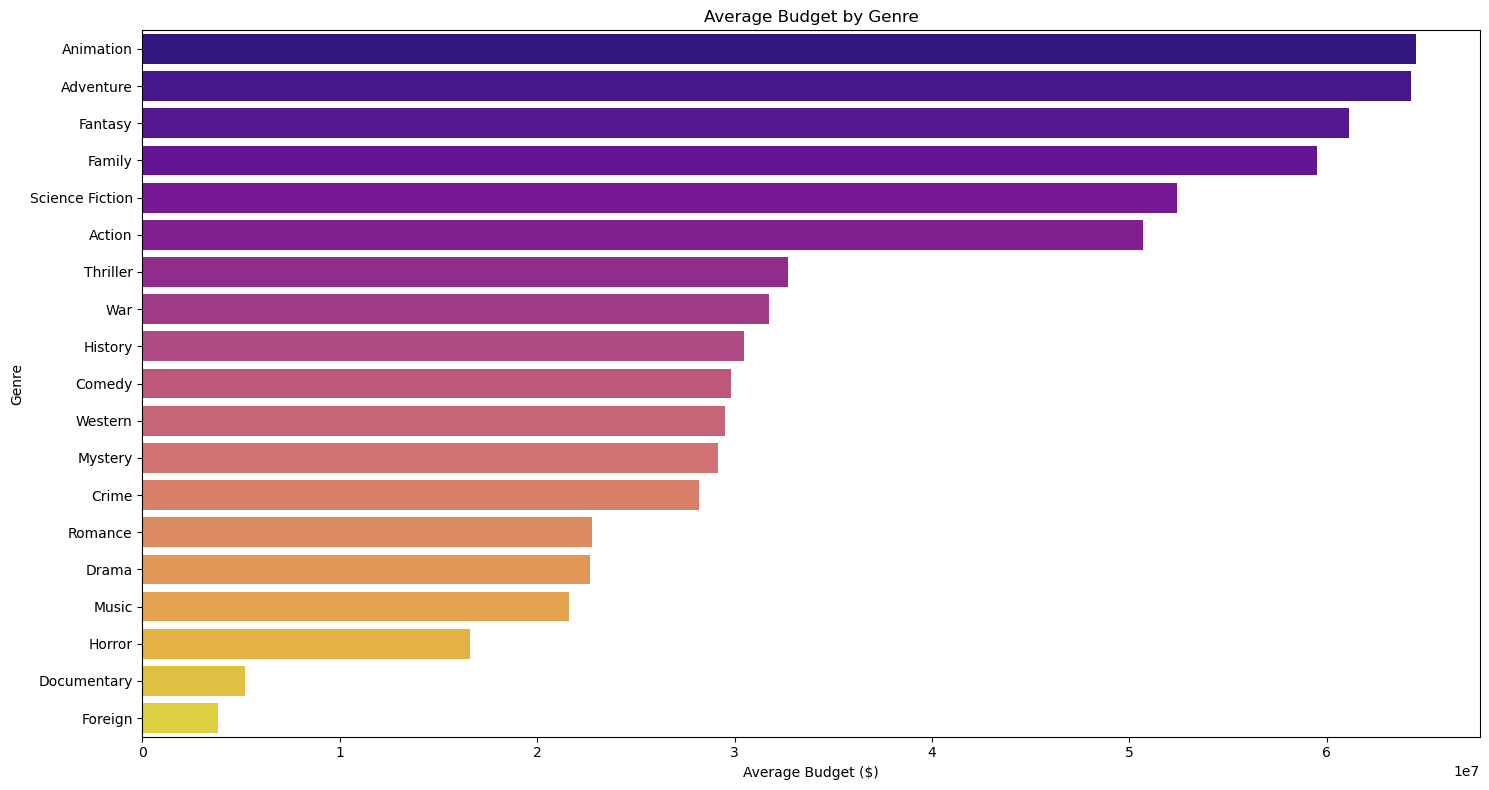

In [262]:
# Average budget by genre
plt.figure(figsize=(15, 8))
genre_budgets = {}

for i, row in movies.iterrows():
    if row['budget'] > 0:  # Only consider movies with valid budget
        for genre in row['genres']:
            if genre not in genre_budgets:
                genre_budgets[genre] = []
            genre_budgets[genre].append(row['budget'])

genre_avg_budgets = {genre: sum(budgets)/len(budgets) for genre, budgets in genre_budgets.items() if len(budgets) >= 10}
genre_budget_df = pd.DataFrame({'Genre': list(genre_avg_budgets.keys()), 'Average Budget': list(genre_avg_budgets.values())})
genre_budget_df = genre_budget_df.sort_values('Average Budget', ascending=False)

sns.barplot(x='Average Budget', y='Genre', data=genre_budget_df, palette='plasma')
plt.title('Average Budget by Genre')
plt.xlabel('Average Budget ($)')
plt.tight_layout()
plt.show()

I'll do some feature engineering